# Standardize the d-dimensional dataset

## load data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
df_wine = pd.DataFrame(wine['data'])
df_wine['13'] = wine['target']

In [4]:
# df = pd.read_csv(
#     'https://archive.ics.uci.edu/ml/'
#     'machine-learning-databases/wine/wine.data',
#     header=None
# )

In [5]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X, y = df_wine.iloc[:, 0: 13], df_wine.iloc[:, 13]

In [8]:
X = np.array(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=1,
    test_size=.3
)

In [10]:
np.bincount(y_test)

array([18, 21, 15])

## standardize the features

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Construct the Covariance matrix

In [14]:
cov_mat = np.cov(X_train_std.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.008130,0.142576,0.216894,-0.297656,0.301741,0.270999,0.216022,-0.188807,0.168867,0.552110,-0.074555,0.016935,0.650816
1,0.142576,1.008130,0.157886,0.277818,-0.010176,-0.362185,-0.456586,0.274143,-0.201464,0.325556,-0.608144,-0.404688,-0.182838
2,0.216894,0.157886,1.008130,0.434379,0.283076,0.230356,0.245524,0.157924,0.060187,0.280923,-0.004747,0.084628,0.217560
3,-0.297656,0.277818,0.434379,1.008130,-0.059558,-0.272445,-0.272435,0.342492,-0.171005,-0.009990,-0.229198,-0.183910,-0.414127
4,0.301741,-0.010176,0.283076,-0.059558,1.008130,0.246052,0.228664,-0.299663,0.164218,0.323610,0.049627,0.050863,0.395762
5,0.270999,-0.362185,0.230356,-0.272445,0.246052,1.008130,0.868463,-0.450266,0.645381,-0.058601,0.458783,0.712981,0.511993
6,0.216022,-0.456586,0.245524,-0.272435,0.228664,0.868463,1.008130,-0.518462,0.683040,-0.152997,0.536237,0.789522,0.494088
7,-0.188807,0.274143,0.157924,0.342492,-0.299663,-0.450266,-0.518462,1.008130,-0.398351,0.101375,-0.250166,-0.506646,-0.319294
8,0.168867,-0.201464,0.060187,-0.171005,0.164218,0.645381,0.683040,-0.398351,1.008130,-0.005247,0.284246,0.556632,0.380387
9,0.552110,0.325556,0.280923,-0.009990,0.323610,-0.058601,-0.152997,0.101375,-0.005247,1.008130,-0.497740,-0.463089,0.365115


# 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.

In [15]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [16]:
eigen_vals

array([4.7095539 , 2.63606471, 1.55728758, 0.93422662, 0.85129454,
       0.5709688 , 0.46462025, 0.37764772, 0.10409155, 0.14951983,
       0.21165109, 0.2630501 , 0.27571434])

# 4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.

**Variance explained ratio**

In [17]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [18]:
import matplotlib.pyplot as plt

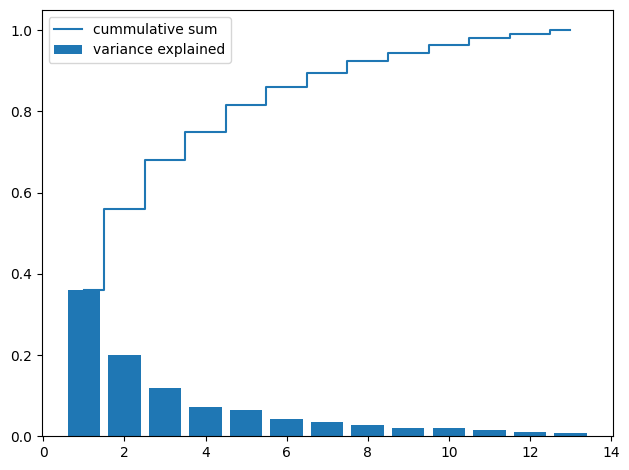

In [19]:
plt.bar(range(1, len(eigen_vals)+1), var_exp,
        align='center',
       label='variance explained')
plt.step(range(1, len(eigen_vals)+1), cum_var_exp,
         where='mid',
        label='cummulative sum')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Sorting the eigenpair**

In [25]:
eigen_pair = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])\
for i in range(eigen_vals.shape[0])]

In [27]:
eigen_pair.sort(key = lambda k: k[0], reverse=True)

# 5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace.

In [28]:
# two eigenvectors have been chosen for the purpose of illustration
k = 2

# 6. Construct a projection matrix, W, from the “top” k eigenvectors.

In [29]:
w = np.hstack((eigen_pair[0][1][:, np.newaxis],
               eigen_pair[1][1][:, np.newaxis]))

In [30]:
# # or
# w = np.array((eigen_pair[0][1], eigen_pair[1][1])).T

In [31]:
w.shape

(13, 2)

# 7. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace

In [32]:
X_train_pca = X_train_std.dot(w)

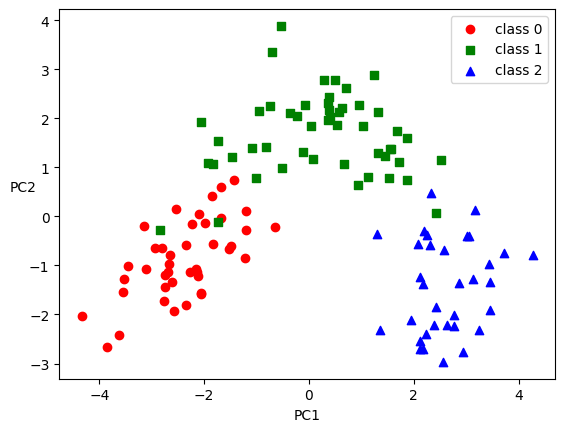

In [33]:
markers = ['o', 's', '^']
colors = ['r', 'g', 'b']
for l, m, c in zip(np.unique(y_train), markers, colors):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], 
                marker=m,
                color=c,
               label='class {}'.format(l))
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2', rotation=0)
plt.show()

# SKLEARN

In [34]:
 from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std) 

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression(multi_class='ovr',
                       random_state=1, 
                       solver='lbfgs')

In [39]:
lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
y_predict = lr.predict(X_test_pca)

In [42]:
accuracy_score(y_test, y_predict)

0.9814814814814815

In [43]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

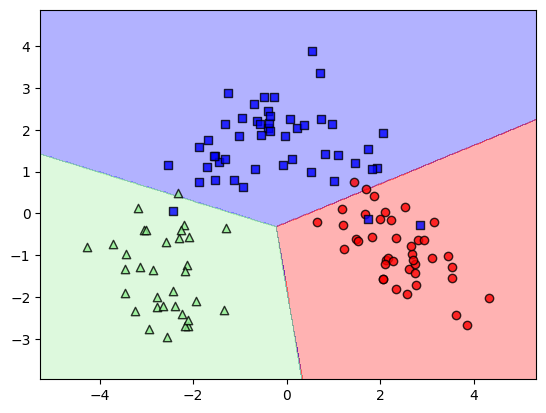

In [44]:
plot_decision_regions(X_train_pca, y_train, lr)

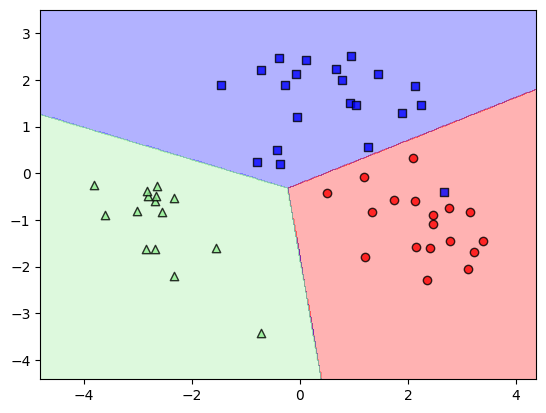

In [45]:
plot_decision_regions(X_test_pca, y_test, lr)

In [46]:
pca.explained_variance_ratio_

array([0.35935182, 0.20113893])

## explaine variance ratio

In [47]:
pca = PCA(n_components=None)

In [48]:
pca.fit(X_train_std)

PCA()

In [49]:
evr = pca.explained_variance_ratio_

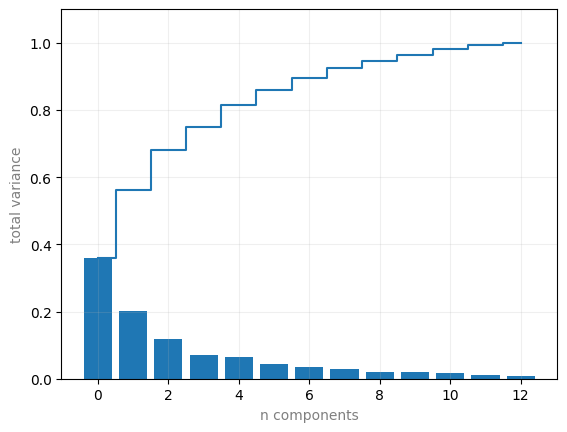

In [50]:
plt.bar(range(evr.shape[0]), evr)
cumulative_sum_var = np.cumsum(evr)
plt.step(range(evr.shape[0]), cumulative_sum_var,
        where='mid') 
plt.ylim(0, 1.1)
plt.grid(alpha=0.2)
plt.xlabel('n components', alpha=0.5)
plt.ylabel('total variance', rotation=90, alpha=0.5)
plt.show()

# tmp

## load data

In [51]:
arr1 = np.array([0, 1, 2])
arr2 = np.array([0, 1, 2])

In [52]:
df = pd.DataFrame([arr1, arr2]).T

In [53]:
df.values

array([[0, 0],
       [1, 1],
       [2, 2]])

In [54]:
X = df.values

### standardization

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [57]:
X_std = sc.fit_transform(X)

In [58]:
X_std.std()

0.9999999999999999

## contruct the covariance matrix

In [59]:
cov_mat = np.cov(X.T)

## decompose covariance matrix into its eigenvalues and eigenvectors

In [60]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [61]:
eig_vecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [62]:
eig_vals

array([2., 0.])

## Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.

**variance explained ratio**

In [63]:
tot = sum(eig_vals)
var_exp = [eig_val/tot for eig_val in sorted(eig_vals, reverse=True)]
cumulative_sum_var_exp = np.cumsum(var_exp)

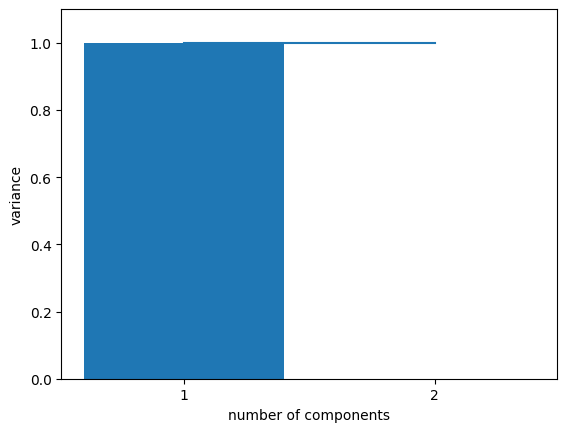

In [64]:
plt.bar(range(1, len(var_exp) + 1), var_exp)
plt.step(range(1, len(var_exp) + 1), cumulative_sum_var_exp, where='mid')
plt.xticks([1, 2])
plt.ylim([0, 1.1])
plt.xlabel('number of components')
plt.ylabel('variance')
plt.show()

**Sorting the eigenpair**

In [65]:
eig_pair = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]

In [66]:
eig_pair

[(2.0, array([0.70710678, 0.70710678])),
 (0.0, array([-0.70710678,  0.70710678]))]

In [67]:
eig_pair.sort(key = lambda k: k[0], reverse=True)

## Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace.

In [68]:
k = 1

## Construct a projection matrix, W, from the “top” k eigenvectors.

In [69]:
w = eig_pair[0][1][: , np.newaxis]

In [70]:
w

array([[0.70710678],
       [0.70710678]])

## Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace

In [71]:
np.dot(X_std, w)

array([[-1.73205081],
       [ 0.        ],
       [ 1.73205081]])

## sklearn

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components = 1)

In [74]:
pca.fit(X_std)

PCA(n_components=1)

In [75]:
X_pca = pca.transform(X_std)
X_pca

array([[-1.73205081],
       [ 0.        ],
       [ 1.73205081]])

# Assessing feature contributions

**loading score**
+ là các hệ số cho các feature ban đầu tạo nên PC.
+ ví dụ: một pc được tạo ra từ 4 thành phần của trục x và 1 thành phần của trục y. Ta gọi 4 và 1 là các loading scores của pc đó.
+ **Eigenvector** sẽ bằng loading scores **chia** cho squared root **eigenvalue**
+ eigenvalue là bình phương độ dài của vector ban đầu khi chưa chuẩn hóa thành vector unit (eigenvector)
+ loading score cũng được hiểu là sự đóng góp (**contributions**) của original cho principal component

In [102]:
# loading scores sẽ bằng eigenvector nhân với squared root eigenvalue
loading_scores = eigen_vecs * np.sqrt(eigen_vals)

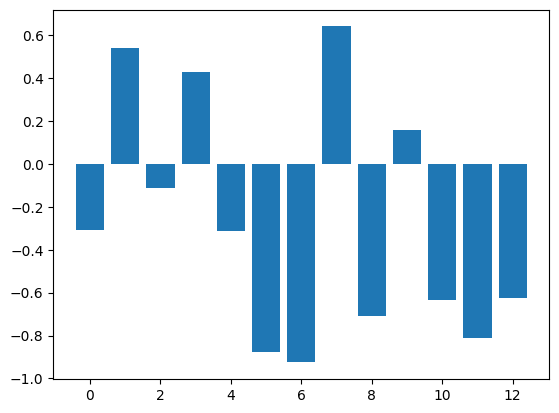

In [108]:
plt.bar(range(13), loading_scores[:, 0])
plt.show()

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components=2)

In [112]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [113]:
pca.components_

array([[ 0.14119433, -0.24946815,  0.05104853, -0.19890851,  0.1444494 ,
         0.40472564,  0.42654202, -0.29573373,  0.32620144, -0.07420694,
         0.29277478,  0.37482201,  0.2889145 ],
       [-0.46732089, -0.26876924, -0.27660192,  0.01955098, -0.32120489,
        -0.04839313,  0.00936768, -0.00146817, -0.04087554, -0.53982087,
         0.27536907,  0.19149315, -0.34828709]])

In [115]:
pca.explained_variance_

array([4.7095539 , 2.63606471])

In [120]:
sklearn_loading = pca.components_.T * np.sqrt(pca.explained_variance_)

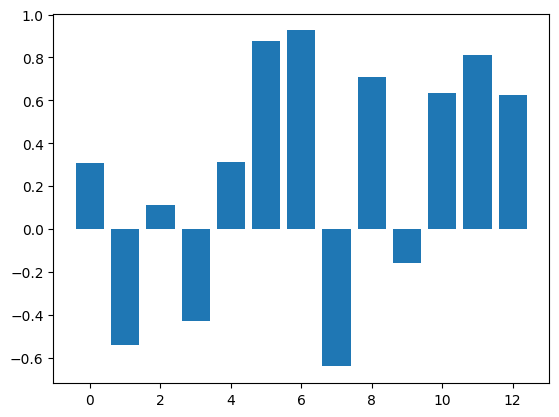

In [123]:
plt.bar(range(sklearn_loading.shape[0]), sklearn_loading[:, 0])
plt.show()